In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
#Load Dataset
df = pd.read_csv("customer_feedback_satisfaction.csv")

In [3]:
df.info

<bound method DataFrame.info of        CustomerID  Age  Gender Country  Income  ProductQuality  \
0               1   56    Male      UK   83094               5   
1               2   69    Male      UK   86860              10   
2               3   46  Female     USA   60173               8   
3               4   32  Female      UK   73884               7   
4               5   60    Male      UK   97546               6   
...           ...  ...     ...     ...     ...             ...   
38439       38440   55  Female     USA   80880               6   
38440       38441   44    Male  Canada   42845               5   
38441       38442   43  Female     USA   71433               7   
38442       38443   28  Female     USA  105587               7   
38443       38444   64  Female  Canada  105379               2   

       ServiceQuality  PurchaseFrequency FeedbackScore LoyaltyLevel  \
0                   8                  5           Low       Bronze   
1                   2            

In [4]:
df.head()

,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,1,56,Male,UK,83094,5,8,5,Low,Bronze,100.0
1,2,69,Male,UK,86860,10,2,8,Medium,Gold,100.0
2,3,46,Female,USA,60173,8,10,18,Medium,Silver,100.0
3,4,32,Female,UK,73884,7,10,16,Low,Gold,100.0
4,5,60,Male,UK,97546,6,4,13,Low,Bronze,82.0


In [5]:
df.describe()

,CustomerID,Age,Income,ProductQuality,ServiceQuality,PurchaseFrequency,SatisfactionScore
count,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000
mean,19222.500000,43.496853,75076.619238,5.494746,5.492769,10.453881,85.276409
std,11097.971211,14.972748,25975.752966,2.873192,2.875812,5.765621,16.898577
min,1.000000,18.000000,30001.000000,1.000000,1.000000,1.000000,4.280000
25%,9611.750000,31.000000,52624.500000,3.000000,3.000000,5.000000,74.470000
50%,19222.500000,43.000000,75236.000000,5.000000,5.000000,10.000000,91.270000
75%,28833.250000,56.000000,97606.750000,8.000000,8.000000,15.000000,100.000000
max,38444.000000,69.000000,119999.000000,10.000000,10.000000,20.000000,100.000000


In [6]:
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Country              0
Income               0
ProductQuality       0
ServiceQuality       0
PurchaseFrequency    0
FeedbackScore        0
LoyaltyLevel         0
SatisfactionScore    0
dtype: int64

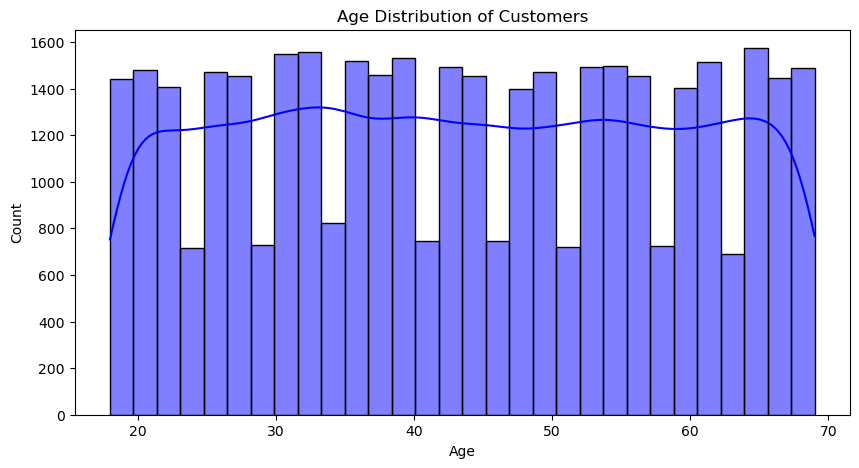

In [7]:
# Age Distribution
plt.figure(figsize=(10,5))
sns.histplot(df["Age"], bins=30, kde=True, color="blue")
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

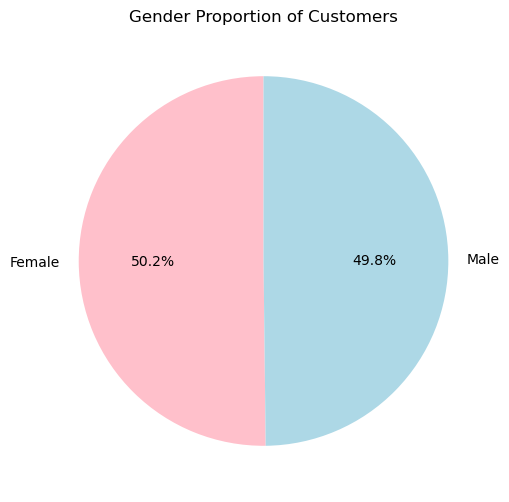

In [8]:
# Gender Proportion
plt.figure(figsize=(6,6))
df["Gender"].value_counts().plot.pie(autopct="%1.1f%%", colors=["pink" , "lightblue"], startangle=90)
plt.title("Gender Proportion of Customers")
plt.ylabel("") 
plt.show()

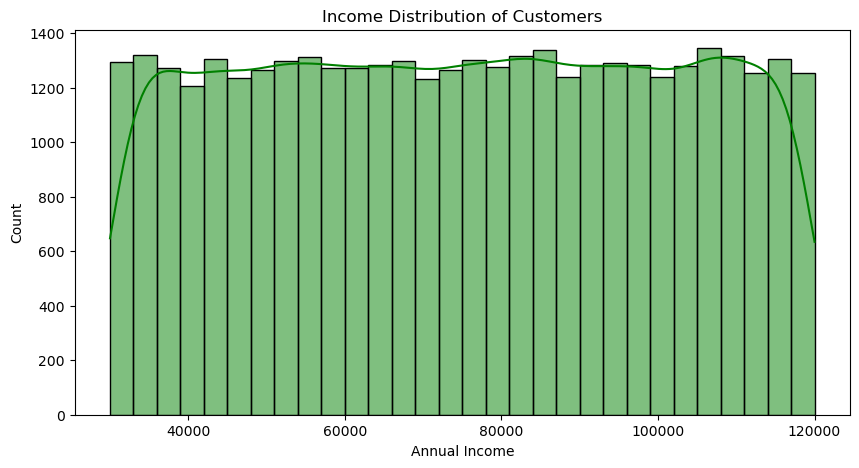

In [9]:
# Income Distribution
plt.figure(figsize=(10,5))
sns.histplot(df["Income"], bins=30, kde=True, color="green")
plt.title("Income Distribution of Customers")
plt.xlabel("Annual Income")
plt.ylabel("Count")
plt.show()

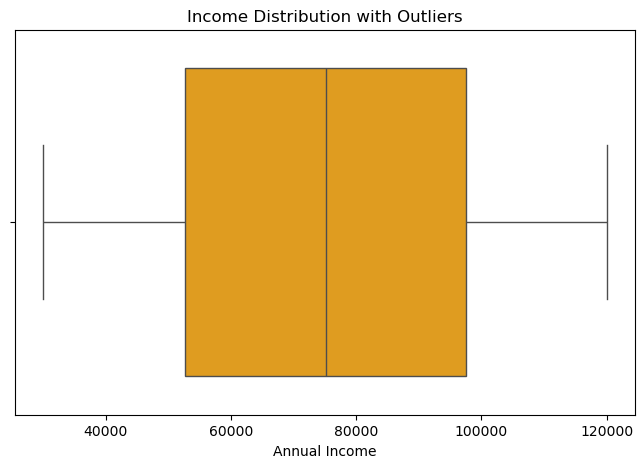

In [10]:
# Income Boxplot (Detect Outliers)
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Income"], color="orange")
plt.title("Income Distribution with Outliers")
plt.xlabel("Annual Income")
plt.show()

C:\Users\yhuj\AppData\Local\Temp\ipykernel_13968\4223830215.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Country"], order=df["Country"].value_counts().index, palette="coolwarm")


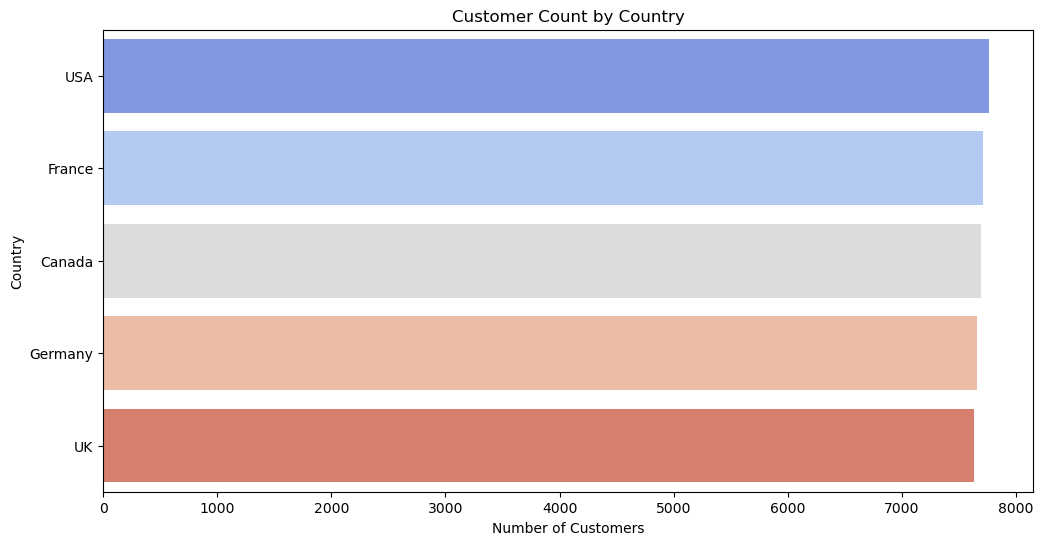

In [11]:
#Customer Distribution by Country
plt.figure(figsize=(12,6))
sns.countplot(y=df["Country"], order=df["Country"].value_counts().index, palette="coolwarm")
plt.title("Customer Count by Country")
plt.xlabel("Number of Customers")
plt.ylabel("Country")
plt.show()

In [12]:
# Encode Categorical Variables
categorical_columns = ["Gender", "Country", "FeedbackScore", "LoyaltyLevel"]
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for later interpretation


In [13]:
#Selecting Features for Clustering
features = ["Age", "Income", "ProductQuality", "ServiceQuality", "PurchaseFrequency", "FeedbackScore", "LoyaltyLevel"]
df_cluster = df[features]

In [14]:
#Feature Scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

In [15]:
# Finding Optimal Clusters using Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

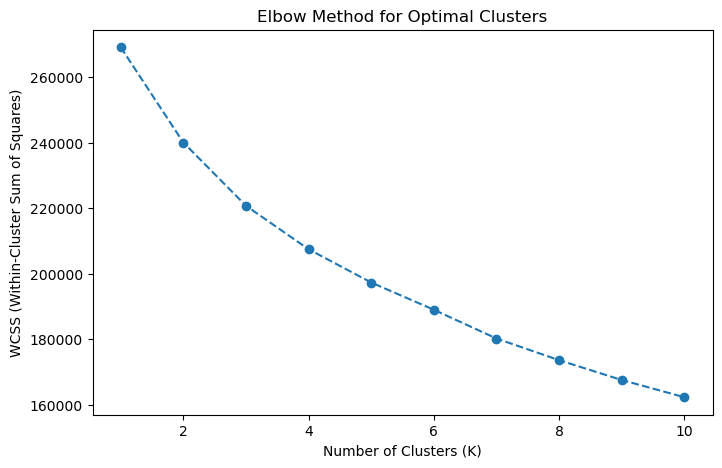

In [16]:
# Plot the Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

In [17]:
# Applying K-Means Clustering (Choose Optimal K)
optimal_k = 4  # Adjust based on the elbow curve
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df["Cluster"] = kmeans.fit_predict(df_scaled)

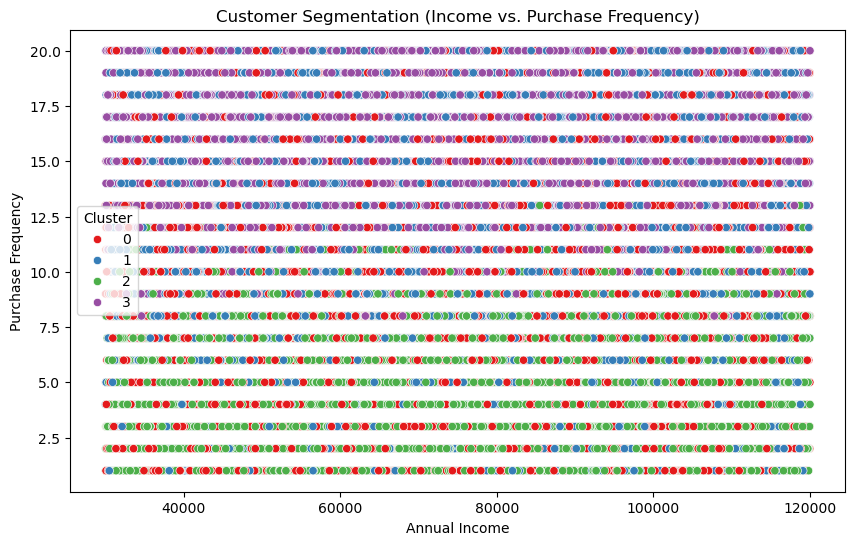

In [18]:
# Visualizing Customer Segments
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["Income"], y=df["PurchaseFrequency"], hue=df["Cluster"], palette="Set1")
plt.title("Customer Segmentation (Income vs. Purchase Frequency)")
plt.xlabel("Annual Income")
plt.ylabel("Purchase Frequency")
plt.legend(title="Cluster")
plt.show()

In [19]:
# Interpreting Clusters
cluster_summary = df.groupby("Cluster").mean()
print(cluster_summary)

           CustomerID        Age    Gender   Country        Income  \
Cluster                                                              
0        19436.163850  43.648473  0.498163  2.011861  75637.874567   
1        19090.645319  43.035603  0.499481  2.009134  75111.589371   
2        19121.527685  43.313072  0.502394  1.998647  75075.383535   
3        19243.673592  43.989354  0.492506  1.986667  74490.354729   

         ProductQuality  ServiceQuality  PurchaseFrequency  FeedbackScore  \
Cluster                                                                     
0              5.654561        8.178860           8.860292       1.663483   
1              5.439693        2.850945          12.042661       1.666494   
2              5.421003        4.657785           5.122398       0.332535   
3              5.465426        6.307597          15.735607       0.327649   

         LoyaltyLevel  SatisfactionScore  
Cluster                                   
0            0.945628         

In [20]:
# Check the Size of Each Cluster
print("Cluster Sizes:\n", df["Cluster"].value_counts())


Cluster Sizes:
 Cluster
3    9675
1    9634
2    9608
0    9527
Name: count, dtype: int64


In [21]:
##Demographic Breakdown by Cluster

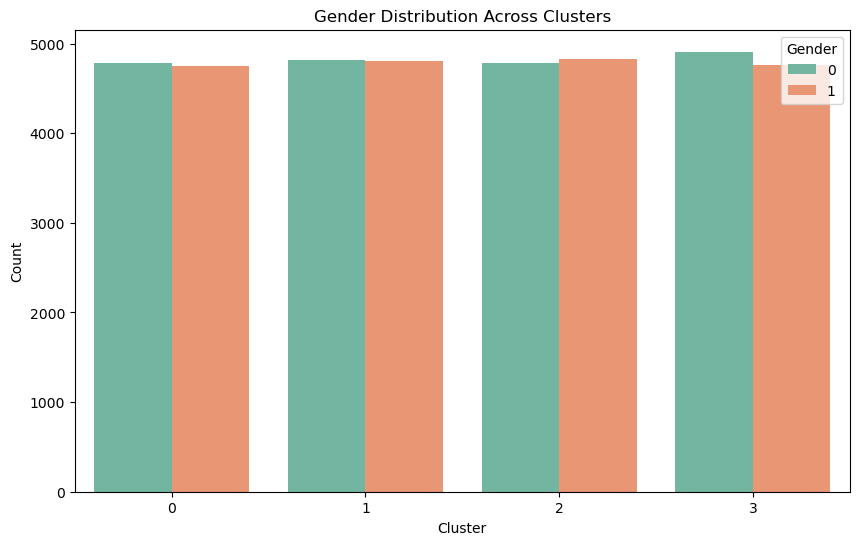

In [22]:
# Gender Distribution Across Clusters
plt.figure(figsize=(10,6))
sns.countplot(x=df["Cluster"], hue=df["Gender"], palette="Set2")
plt.title("Gender Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

C:\Users\yhuj\AppData\Local\Temp\ipykernel_13968\2569965831.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Cluster"], y=df["Age"], palette="coolwarm")


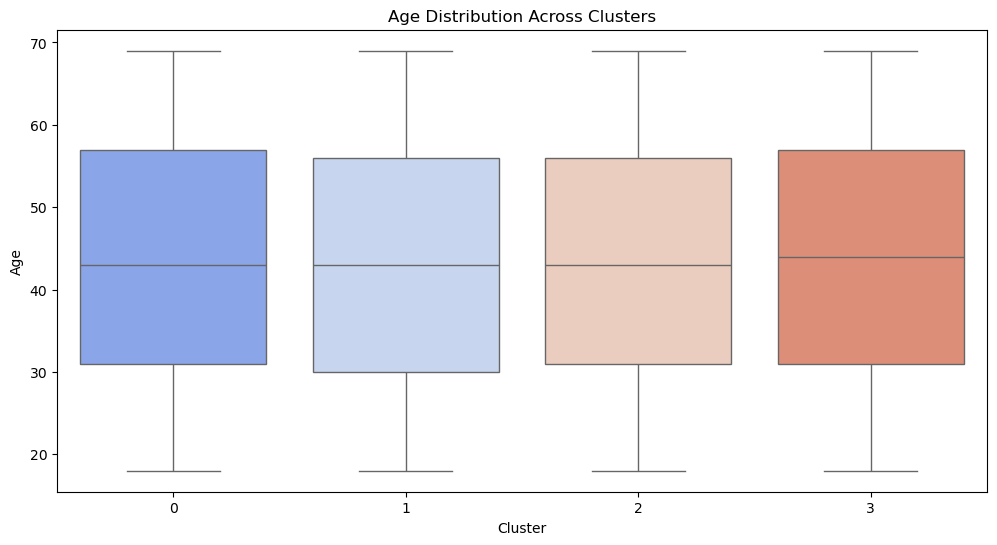

In [23]:
# Age Distribution Across Clusters
plt.figure(figsize=(12,6))
sns.boxplot(x=df["Cluster"], y=df["Age"], palette="coolwarm")
plt.title("Age Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Age")
plt.show()

C:\Users\yhuj\AppData\Local\Temp\ipykernel_13968\1199603043.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Cluster"], y=df["Income"], palette="Blues")


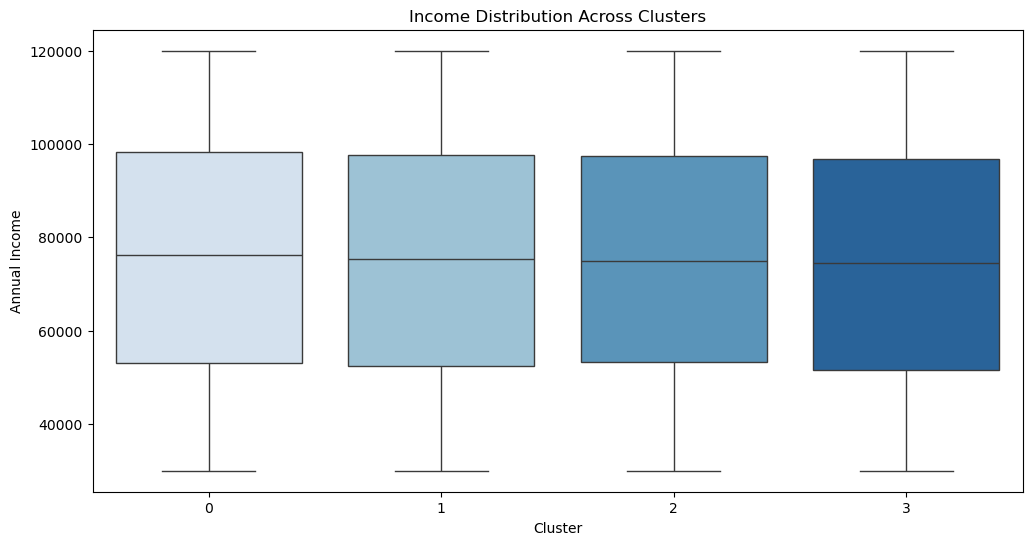

In [24]:
# Income Distribution Across Clusters
plt.figure(figsize=(12,6))
sns.boxplot(x=df["Cluster"], y=df["Income"], palette="Blues")
plt.title("Income Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Annual Income")
plt.show()

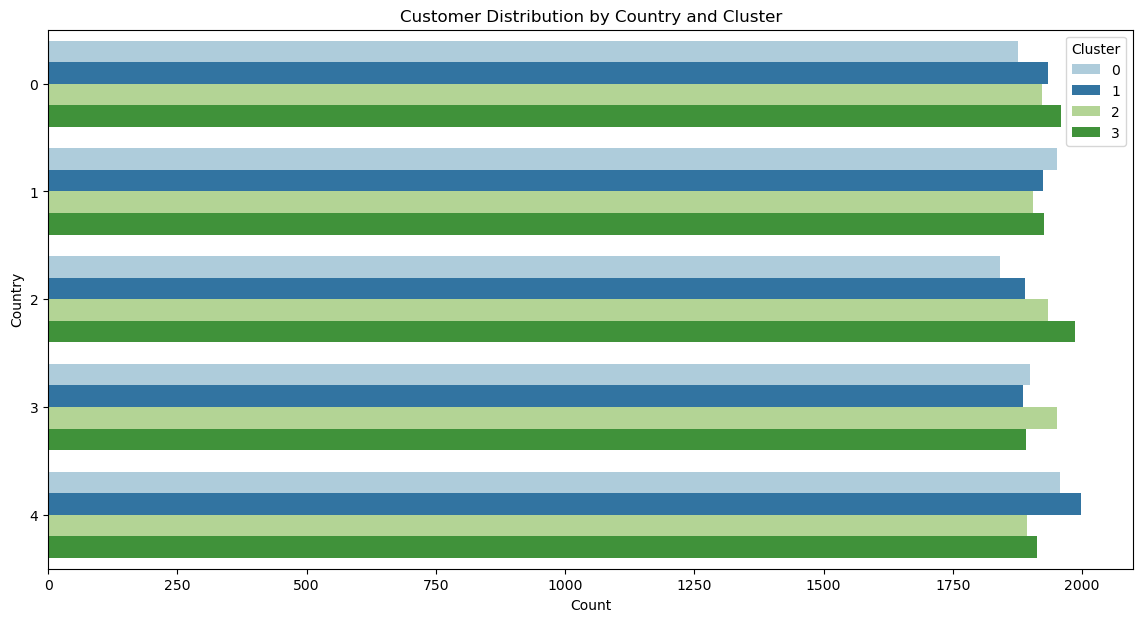

In [25]:
plt.figure(figsize=(14,7))
sns.countplot(y=df["Country"], hue=df["Cluster"], palette="Paired")
plt.title("Customer Distribution by Country and Cluster")
plt.xlabel("Count")
plt.ylabel("Country")
plt.legend(title="Cluster")
plt.show()

In [26]:
# Get average values of key features per cluster
cluster_summary = df.groupby("Cluster")[["Age", "Income", "ProductQuality", "ServiceQuality", "PurchaseFrequency", "FeedbackScore"]].mean()
print(cluster_summary)


               Age        Income  ProductQuality  ServiceQuality  \
Cluster                                                            
0        43.648473  75637.874567        5.654561        8.178860   
1        43.035603  75111.589371        5.439693        2.850945   
2        43.313072  75075.383535        5.421003        4.657785   
3        43.989354  74490.354729        5.465426        6.307597   

         PurchaseFrequency  FeedbackScore  
Cluster                                    
0                 8.860292       1.663483  
1                12.042661       1.666494  
2                 5.122398       0.332535  
3                15.735607       0.327649  


In [27]:
# Save Processed Data for Further Analysis
df.to_csv("demographic_analysis_results.csv", index=False)